In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from dtreeviz.trees import dtreeviz

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Reforming-ML/Data/

/content/gdrive/MyDrive/Reforming-ML/Data


In [4]:
h2_df = pd.read_csv('H2MoleFractionReforming.csv')
co2_df = pd.read_csv('CO2MoleFractionReforming.csv')
co_df = pd.read_csv('COMoleFractionReforming.csv')
ch4_df = pd.read_csv('CH4MoleFractionReforming.csv')

In [5]:
h2_df

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,H2 Mole Fraction
0,1073.15,150000,16.2000,5,0.207594,0.666667,0.00,0.327551
1,973.15,180000,5.7616,50,5.900000,0.672495,2.02,0.321360
2,1073.15,150000,16.2000,10,1.825125,0.500000,0.00,0.195703
3,1073.15,150000,16.2000,5,0.449616,0.500000,0.00,0.349147
4,973.15,180000,5.7616,50,5.183333,0.672495,2.02,0.339261
...,...,...,...,...,...,...,...,...
706,973.15,180000,5.7616,50,16.516667,0.672495,2.02,0.041297
707,973.15,180000,5.7616,20,18.833333,0.672495,2.02,0.032504
708,1073.15,150000,16.2000,10,3.293279,0.666667,0.00,0.201936
709,973.15,180000,16.2000,10,2.794337,0.666667,0.00,0.170880


In [ ]:
co2_800 = co2_df[co2_df['Temp'] == 1073.15]
len(co2_800[co2_800['H2O/CH4'] != 0])

209

In [ ]:
ch4_700 = ch4_df[ch4_df['Temp'] == 973.15]
ch4_800 = ch4_df[ch4_df['Temp'] == 1073.15]
len(ch4_800[ch4_800['H2O/CH4'] != 0])

209

In [6]:
model_h2 = pickle.load(open('../Model-Weights/random_forest_h2_mf.sav', 'rb'))
model_co2 = pickle.load(open('../Model-Weights/random_forest_co2_mf.sav', 'rb'))
model_co = pickle.load(open('../Model-Weights/random_forest_CO_mf.sav', 'rb'))
model_ch4 = pickle.load(open('../Model-Weights/random_forest_ch4_mf_new.sav', 'rb'))

In [7]:
h2 = h2_df.values
co2 = co2_df.values
co = co_df.values
ch4 = ch4_df.values

In [8]:
h2_x = h2[:,:7]
h2_y = h2[:, 7]
co2_x = co2[:,:7]
co2_y = co2[:, 7]
co_x = co[:,:7]
co_y = co[:, 7]
ch4_x = ch4[:,:7]
ch4_y = ch4[:, 7]

In [9]:
h2_x_train = h2_x[:569]
h2_y_train = h2_y[:569]
co2_x_train = co2_x[:334]
co2_y_train = co2_y[:334]
co_x_train = co_x[:578]
co_y_train = co_y[:578]
ch4_x_train = ch4_x[:334]
ch4_y_train = ch4_y[:334]

In [10]:
h2_x_test = h2_x[569:]
h2_y_test = h2_y[569:]
co2_x_test = co2_x[334:]
co2_y_test = co2_y[334:]
co_x_test = co_x[578:]
co_y_test = co_y[578:]
ch4_x_test = ch4_x[334:]
ch4_y_test = ch4_y[334:]

In [11]:
mms_h2 = MinMaxScaler()
h2_x_train = mms_h2.fit_transform(h2_x_train)
h2_x_test = mms_h2.transform(h2_x_test)
mms_co2 = MinMaxScaler()
co2_x_train = mms_co2.fit_transform(co2_x_train)
co2_x_test = mms_co2.transform(co2_x_test)
mms_co = MinMaxScaler()
co_x_train = mms_co.fit_transform(co_x_train)
co_x_test = mms_co.transform(co_x_test)
mms_ch4 = MinMaxScaler()
ch4_x_train = mms_ch4.fit_transform(ch4_x_train)
ch4_x_test = mms_ch4.transform(ch4_x_test)

In [12]:
mms_h2_y = MinMaxScaler()
h2_y_train = mms_h2_y.fit_transform(h2_y_train.reshape(-1, 1))
h2_y_test = mms_h2_y.transform(h2_y_test.reshape(-1, 1))
mms_co2_y = MinMaxScaler()
co2_y_train = mms_co2_y.fit_transform(co2_y_train.reshape(-1, 1))
co2_y_test = mms_co2_y.transform(co2_y_test.reshape(-1, 1))
mms_co_y = MinMaxScaler()
co_y_train = mms_co_y.fit_transform(co_y_train.reshape(-1, 1))
co_y_test = mms_co_y.transform(co_y_test.reshape(-1, 1))
mms_ch4_y = MinMaxScaler()
ch4_y_train = mms_ch4_y.fit_transform(ch4_y_train.reshape(-1, 1))
ch4_y_test = mms_ch4_y.transform(ch4_y_test.reshape(-1, 1))

In [13]:
h2_pred_test = model_h2.predict(np.concatenate((h2_x_train, h2_x_test)))
error = mean_squared_error(np.concatenate((h2_y_train,h2_y_test)), h2_pred_test)
print('MSE: %.3f' % error)
R2_score = r2_score(np.concatenate((h2_y_train,h2_y_test)), h2_pred_test)
print('R^2 Score: %.3f' % R2_score)
h2_pred_test = mms_h2_y.inverse_transform(h2_pred_test.reshape(-1,1))

MSE: 0.001
R^2 Score: 0.984


In [14]:
co2_pred_test = model_co2.predict(np.concatenate((co2_x_train, co2_x_test)))
error = mean_squared_error(np.concatenate((co2_y_train,co2_y_test)), co2_pred_test)
print('MSE: %.3f' % error)
R2_score = r2_score(np.concatenate((co2_y_train,co2_y_test)), co2_pred_test)
print('R^2 Score: %.3f' % R2_score)
co2_pred_test = mms_co2_y.inverse_transform(co2_pred_test.reshape(-1,1))

MSE: 0.004
R^2 Score: 0.856


In [15]:
co_pred_test = model_co.predict(np.concatenate((co_x_train, co_x_test)))
error = mean_squared_error(np.concatenate((co_y_train,co_y_test)), co_pred_test)
print('MSE: %.3f' % error)
R2_score = r2_score(np.concatenate((co_y_train,co_y_test)), co_pred_test)
print('R^2 Score: %.3f' % R2_score)
co_pred_test = mms_co_y.inverse_transform(co_pred_test.reshape(-1,1))

MSE: 0.001
R^2 Score: 0.988


In [16]:
ch4_pred_test = model_ch4.predict(np.concatenate((ch4_x_train, ch4_x_test)))
error = mean_squared_error(np.concatenate((ch4_y_train,ch4_y_test)), ch4_pred_test)
print('MSE: %.3f' % error)
R2_score = r2_score(np.concatenate((ch4_y_train,ch4_y_test)), ch4_pred_test)
print('R^2 Score: %.3f' % R2_score)
ch4_pred_test = mms_co_y.inverse_transform(ch4_pred_test.reshape(-1,1))

MSE: 0.001
R^2 Score: 0.993


In [ ]:
h2_df['H2 MF Prediction'] = h2_pred_test
co2_df['CO2 MF Prediction'] = co2_pred_test
co_df['CO MF Prediction'] = co_pred_test
ch4_df['CH4 MF Prediction'] = ch4_pred_test

In [ ]:
# h2_df.to_csv('H2_MF_Predictions.csv')
# co2_df.to_csv('CO2_MF_Predictions.csv')
# co_df.to_csv('CO_MF_Predictions.csv')
ch4_df.to_csv('CH4_MF_Predictions_New.csv')

In [19]:
h2_train_df = pd.DataFrame()
co2_train_df = pd.DataFrame()
co_train_df = pd.DataFrame()
ch4_train_df = pd.DataFrame()

In [30]:
h2_train_df = h2_df[:569]
co2_train_df = co2_df[:334]
co_train_df = co_df[:578]
ch4_train_df = ch4_df[:334]
ch4_train_df

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CH4MF
0,1073.15,150000,5.7616,100,6.783333,0.672495,2.02,0.089275
1,973.15,180000,5.7616,100,0.133333,0.672495,2.02,0.001226
2,1073.15,150000,5.7616,100,5.150000,0.672495,2.02,0.034455
3,1073.15,150000,5.7616,50,5.766667,0.672495,2.02,0.031460
4,973.15,180000,5.7616,20,5.383333,0.672495,2.02,0.001313
...,...,...,...,...,...,...,...,...
329,973.15,180000,5.7616,100,5.683333,0.672495,2.02,0.071459
330,973.15,180000,5.7616,100,1.866667,0.672495,2.02,0.003332
331,973.15,180000,5.7616,100,4.216667,0.672495,2.02,0.025098
332,973.15,180000,5.7616,100,3.033333,0.672495,2.02,0.008156


In [31]:
h2_train_df['H2 MF Train Prediction'] = h2_pred_test[:569]
co2_train_df['CO2 MF Train Prediction'] = co2_pred_test[:334]
co_train_df['CO MF Train Prediction'] = co_pred_test[:578]
ch4_train_df['CH4 MF Train Prediction'] = ch4_pred_test[:334]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [32]:
h2_train_df

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,H2 Mole Fraction,H2 MF Train Prediction
0,1073.15,150000,16.2000,5,0.207594,0.666667,0.00,0.327551,0.323652
1,973.15,180000,5.7616,50,5.900000,0.672495,2.02,0.321360,0.320441
2,1073.15,150000,16.2000,10,1.825125,0.500000,0.00,0.195703,0.196950
3,1073.15,150000,16.2000,5,0.449616,0.500000,0.00,0.349147,0.339793
4,973.15,180000,5.7616,50,5.183333,0.672495,2.02,0.339261,0.337203
...,...,...,...,...,...,...,...,...,...
564,1073.15,150000,16.2000,5,10.819929,0.666667,0.00,0.132661,0.135848
565,973.15,180000,5.7616,50,0.750000,0.672495,2.02,0.372036,0.379928
566,1073.15,150000,5.7616,20,5.780000,0.672495,2.02,0.375978,0.374743
567,973.15,180000,16.2000,10,2.326983,0.500000,0.00,0.138403,0.142083


In [34]:
h2_train_df.to_csv('../Predictions-RF/H2_MF_Training_Final_Predictions.csv')
co2_train_df.to_csv('../Predictions-RF/CO2_MF_Training_Final_Predictions.csv')
co_train_df.to_csv('../Predictions-RF/CO_MF_Training_Final_Predictions.csv')
ch4_train_df.to_csv('../Predictions-RF/CH4_MF_Training_Final_Predictions.csv')

In [35]:
h2_test_df = h2_df[569:]
co2_test_df = co2_df[334:]
co_test_df = co_df[578:]
ch4_test_df = ch4_df[334:]
ch4_test_df

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CH4MF
334,1073.15,150000,5.7616,50,9.516667,0.672495,2.02,0.075710
335,973.15,180000,5.7616,20,18.233333,0.672495,2.02,0.157118
336,973.15,180000,5.7616,50,4.116667,0.672495,2.02,0.010850
337,1073.15,150000,5.7616,20,10.783333,0.672495,2.02,0.025378
338,1073.15,150000,5.7616,50,3.533333,0.672495,2.02,0.005477
...,...,...,...,...,...,...,...,...
413,1073.15,150000,5.7616,20,2.566667,0.672495,2.02,0.000905
414,973.15,180000,5.7616,100,1.566667,0.672495,2.02,0.001317
415,973.15,180000,5.7616,100,0.783333,0.672495,2.02,0.000415
416,973.15,180000,5.7616,100,5.383333,0.672495,2.02,0.050914


In [36]:
h2_test_df['H2 MF Test Prediction'] = h2_pred_test[569:]
co2_test_df['CO2 MF Test Prediction'] = co2_pred_test[334:]
co_test_df['CO MF Test Prediction'] = co_pred_test[578:]
ch4_test_df['CH4 MF Test Prediction'] = ch4_pred_test[334:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [37]:
h2_test_df.to_csv('../Predictions-RF/H2_MF_Testing_Final_Predictions.csv')
co2_test_df.to_csv('../Predictions-RF/CO2_MF_Testing_Final_Predictions.csv')
co_test_df.to_csv('../Predictions-RF/CO_MF_Testing_Final_Predictions.csv')
ch4_test_df.to_csv('../Predictions-RF/CH4_MF_Testing_Final_Predictions.csv')

In [ ]:
h2_pred_df = pd.read_csv('H2_MF_Predictions.csv')
co_pred_df = pd.read_csv('CO_MF_Predictions.csv')

In [ ]:
co_pred_df

,Unnamed: 0,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CO MF,CO MF Prediction
0,0,973.15,180000,5.7616,100,9.400000,0.672495,2.02,0.010886,0.015554
1,1,1073.15,150000,16.2000,10,7.232703,0.666667,0.00,0.075248,0.075749
2,2,973.15,180000,16.2000,10,4.564263,0.666667,0.00,0.089555,0.088572
3,3,973.15,180000,16.2000,10,3.434803,0.666667,0.00,0.109046,0.110084
4,4,973.15,180000,16.2000,10,0.867035,0.666667,0.00,0.190094,0.190495
...,...,...,...,...,...,...,...,...,...,...
718,718,1073.15,150000,5.7616,100,6.783333,0.672495,2.02,0.071500,0.059192
719,719,973.15,180000,5.7616,20,18.533333,0.672495,2.02,0.015072,0.014202
720,720,1073.15,150000,5.7616,50,7.516667,0.672495,2.02,0.081436,0.075034
721,721,1073.15,150000,5.7616,100,1.716667,0.672495,2.02,0.115647,0.117161


In [ ]:
h2_pred_df

,Unnamed: 0,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,H2 Mole Fraction,H2 MF Prediction
0,0,1073.15,150000,16.2000,5,0.207594,0.666667,0.00,0.327551,0.323652
1,1,973.15,180000,5.7616,50,5.900000,0.672495,2.02,0.321360,0.320441
2,2,1073.15,150000,16.2000,10,1.825125,0.500000,0.00,0.195703,0.196950
3,3,1073.15,150000,16.2000,5,0.449616,0.500000,0.00,0.349147,0.339793
4,4,973.15,180000,5.7616,50,5.183333,0.672495,2.02,0.339261,0.337203
...,...,...,...,...,...,...,...,...,...,...
706,706,973.15,180000,5.7616,50,16.516667,0.672495,2.02,0.041297,0.034952
707,707,973.15,180000,5.7616,20,18.833333,0.672495,2.02,0.032504,0.038113
708,708,1073.15,150000,16.2000,10,3.293279,0.666667,0.00,0.201936,0.190251
709,709,973.15,180000,16.2000,10,2.794337,0.666667,0.00,0.170880,0.199177


In [ ]:
h2_df_700 = h2_pred_df[h2_pred_df['Temp'] == 973.15]
h2_df_700_5 = h2_df_700[h2_df_700['ppm'] == 5]
h2_df_700_10 = h2_df_700[h2_df_700['ppm'] == 10]

In [ ]:
co_df_700 = co_pred_df[co_pred_df['Temp'] == 973.15]
co_df_700_5 = co_df_700[co_df_700['ppm'] == 5]
co_df_700_10 = co_df_700[co_df_700['ppm'] == 10]

In [ ]:
h2_df_700_5_onehalf = h2_df_700_5[h2_df_700_5['CO2/CH4'] != 0.5]
h2_df_700_10_onehalf = h2_df_700_10[h2_df_700_10['CO2/CH4'] != 0.5]

In [ ]:
h2_df_700_5_two = h2_df_700_5[h2_df_700_5['CO2/CH4'] == 0.5]
h2_df_700_10_two = h2_df_700_10[h2_df_700_10['CO2/CH4'] == 0.5]

In [ ]:
co_df_700_5_onehalf = co_df_700_5[co_df_700_5['CO2/CH4'] != 0.5]
co_df_700_10_onehalf = co_df_700_10[co_df_700_10['CO2/CH4'] != 0.5]

In [ ]:
co_df_700_5_two = co_df_700_5[co_df_700_5['CO2/CH4'] == 0.5]
co_df_700_10_two = co_df_700_10[co_df_700_10['CO2/CH4'] == 0.5]

In [ ]:
h2_df_800 = h2_pred_df[h2_pred_df['Temp'] == 1073.15]
h2_df_800_5 = h2_df_800[h2_df_800['ppm'] == 5]
h2_df_800_10 = h2_df_800[h2_df_800['ppm'] == 10]

In [ ]:
co_df_800 = co_pred_df[co_pred_df['Temp'] == 1073.15]
co_df_800_5 = co_df_800[co_df_800['ppm'] == 5]
co_df_800_10 = co_df_800[co_df_800['ppm'] == 10]

In [ ]:
h2_df_800_5_onehalf = h2_df_800_5[h2_df_800_5['CO2/CH4'] != 0.5]
h2_df_800_10_onehalf = h2_df_800_10[h2_df_800_10['CO2/CH4'] != 0.5]

In [ ]:
co_df_800_5_onehalf = co_df_800_5[co_df_800_5['CO2/CH4'] != 0.5]
co_df_800_10_onehalf = co_df_800_10[co_df_800_10['CO2/CH4'] != 0.5]

In [ ]:
h2_df_800_5_two = h2_df_800_5[h2_df_800_5['CO2/CH4'] == 0.5]
h2_df_800_10_two = h2_df_800_10[h2_df_800_10['CO2/CH4'] == 0.5]

In [ ]:
co_df_800_5_two = co_df_800_5[co_df_800_5['CO2/CH4'] == 0.5]
co_df_800_10_two = co_df_800_10[co_df_800_10['CO2/CH4'] == 0.5]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572bd36d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572c1ead0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


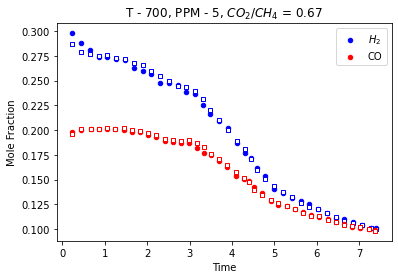

In [ ]:
ax = h2_df_700_5_onehalf.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_700_5_onehalf.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_700_5_onehalf.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_700_5_onehalf.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 5, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-7/700-5-0.67.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057261b610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05726221d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


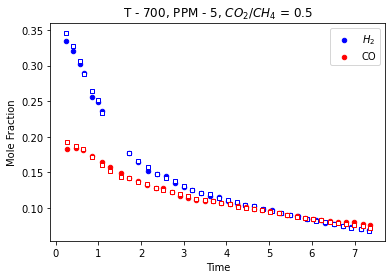

In [ ]:
ax = h2_df_700_5_two.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_700_5_two.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_700_5_two.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_700_5_two.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 5, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-7/700-5-0.5.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572547ed0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05725aa710> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


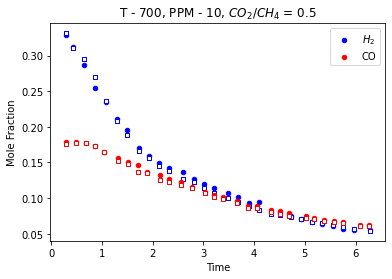

In [ ]:
ax = h2_df_700_10_two.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_700_10_two.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_700_10_two.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_700_10_two.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 10, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-7/700-10-0.5.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05724efed0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057247e3d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


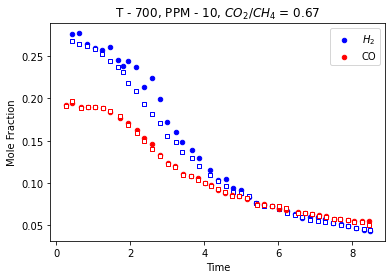

In [ ]:
ax = h2_df_700_10_onehalf.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_700_10_onehalf.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_700_10_onehalf.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_700_10_onehalf.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 10, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-7/700-10-0.67.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572424290> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05724245d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


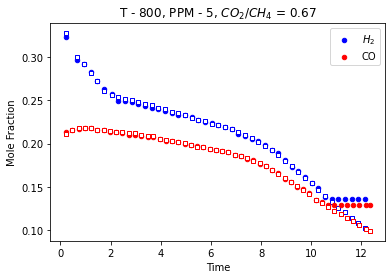

In [ ]:
ax = h2_df_800_5_onehalf.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_800_5_onehalf.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_800_5_onehalf.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_800_5_onehalf.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 5, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-8/800-5-0.67.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05724f6110> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057256d4d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


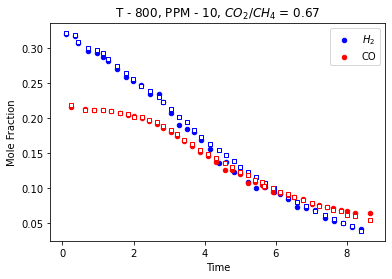

In [ ]:
ax = h2_df_800_10_onehalf.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_800_10_onehalf.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_800_10_onehalf.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_800_10_onehalf.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 10, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-8/800-10-0.67.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05725fc450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057255e190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


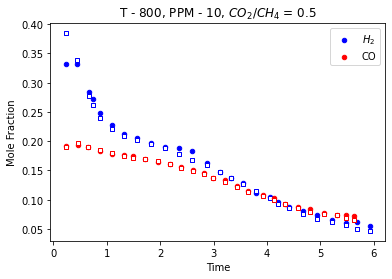

In [ ]:
ax = h2_df_800_10_two.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_800_10_two.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_800_10_two.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_800_10_two.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 10, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-8/800-10-0.5.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057265e050> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05723d0050> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


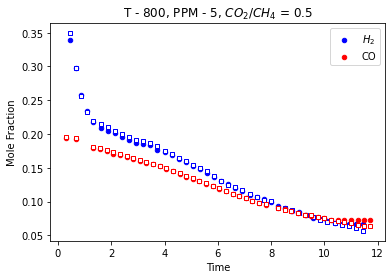

In [ ]:
ax = h2_df_800_5_two.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'blue', figsize =(6,4))
h2_df_800_5_two.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co_df_800_5_two.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'red', ax = ax)
co_df_800_5_two.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', 'CO'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 5, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-8/800-5-0.5.png')

In [ ]:
ch4_df = pd.read_csv('CH4_MF_Predictions_2.csv')

In [ ]:
h2_df_700 = h2_df[h2_df['Temp'] == 973.15]
h2_df_700_20 = h2_df_700[h2_df_700['ppm'] == 20]
h2_df_700_50 = h2_df_700[h2_df_700['ppm'] == 50]
h2_df_700_100 = h2_df_700[h2_df_700['ppm'] == 100]

In [ ]:
co2_df_700 = co2_df[co2_df['Temp'] == 973.15]
co2_df_700_20 = co2_df_700[co2_df_700['ppm'] == 20]
co2_df_700_50 = co2_df_700[co2_df_700['ppm'] == 50]
co2_df_700_100 = co2_df_700[co2_df_700['ppm'] == 100]

In [ ]:
co_df_700 = co_df[co_df['Temp'] == 973.15]
co_df_700_20 = co_df_700[co_df_700['ppm'] == 20]
co_df_700_50 = co_df_700[co_df_700['ppm'] == 50]
co_df_700_100 = co_df_700[co_df_700['ppm'] == 100]

In [ ]:
ch4_df_700 = ch4_df[ch4_df['Temp'] == 973.15]
ch4_df_700_20 = ch4_df_700[ch4_df_700['ppm'] == 20]
ch4_df_700_50 = ch4_df_700[ch4_df_700['ppm'] == 50]
ch4_df_700_100 = ch4_df_700[ch4_df_700['ppm'] == 100]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0571090fd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05710acc10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05710a4050> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

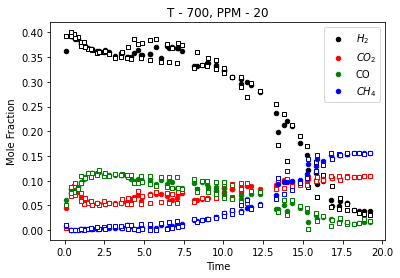

In [ ]:
ax = h2_df_700_20.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6,4))
h2_df_700_20.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_700_20.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_700_20.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_700_20.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_700_20.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_700_20.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
ch4_df_700_20.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', '$CO_2$', 'CO', '$CH_4$'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 20')
plt.savefig('../Plots/Figure-3/700-20-new.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0570fc8c50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0570efe710> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0570f13fd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

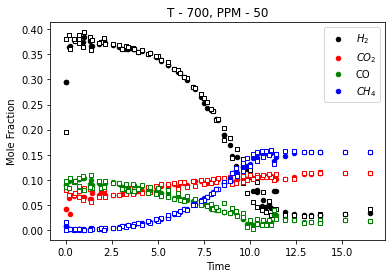

In [ ]:
ax = h2_df_700_50.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6,4))
h2_df_700_50.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_700_50.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_700_50.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_700_50.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_700_50.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_700_50.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
ch4_df_700_50.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', '$CO_2$', 'CO', '$CH_4$'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 50')
plt.savefig('../Plots/Figure-3/700-50-new.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05710b7f10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05710b7c50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057128e610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

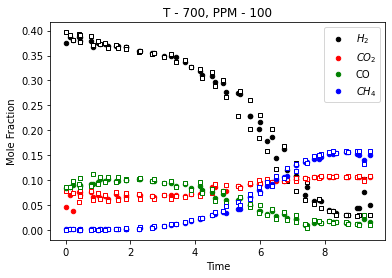

In [ ]:
ax = h2_df_700_100.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6, 4))
h2_df_700_100.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_700_100.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_700_100.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_700_100.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_700_100.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_700_100.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
ch4_df_700_100.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['$H_2$', '$CO_2$', 'CO', '$CH_4$'])
plt.ylabel('Mole Fraction')
plt.title('T - 700, PPM - 100')
plt.savefig('../Plots/Figure-3/700-100-new.png')

In [ ]:
h2_df_800 = h2_df[h2_df['Temp'] == 1073.15]
h2_df_800_20 = h2_df_700[h2_df_700['ppm'] == 20]
h2_df_800_50 = h2_df_700[h2_df_700['ppm'] == 50]
h2_df_800_100 = h2_df_700[h2_df_700['ppm'] == 100]
co2_df_800 = co2_df[co2_df['Temp'] == 1073.15]
co2_df_800_20 = co2_df_800[co2_df_800['ppm'] == 20]
co2_df_800_50 = co2_df_800[co2_df_800['ppm'] == 50]
co2_df_800_100 = co2_df_800[co2_df_800['ppm'] == 100]
co_df_800 = co_df[co_df['Temp'] == 1073.15]
co_df_800_20 = co_df_800[co_df_800['ppm'] == 20]
co_df_800_50 = co_df_800[co_df_800['ppm'] == 50]
co_df_800_100 = co_df_800[co_df_800['ppm'] == 100]
ch4_df_800 = ch4_df[ch4_df['Temp'] == 1073.15]
ch4_df_800_20 = ch4_df_800[ch4_df_800['ppm'] == 20]
ch4_df_800_50 = ch4_df_800[ch4_df_800['ppm'] == 50]
ch4_df_800_100 = ch4_df_800[ch4_df_800['ppm'] == 100]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec678450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec5fb850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec59f8d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

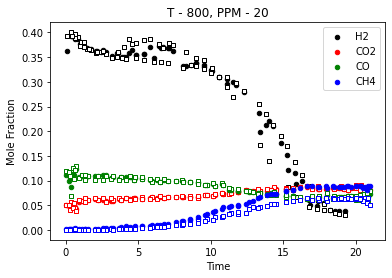

In [ ]:
ax = h2_df_800_20.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6,4))
h2_df_800_20.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_800_20.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_800_20.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_800_20.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_800_20.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_800_20.plot.scatter(x = 'Time', y = 'CH4 MF Prediction', color = 'blue', ax = ax)
ch4_df_800_20.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['H2', 'CO2', 'CO', 'CH4'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 20')
plt.savefig('../Plots/Figure-4/800-20.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec611850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec51d090> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec52a290> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

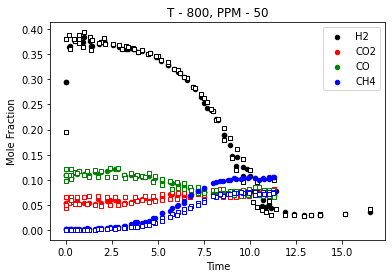

In [ ]:
ax = h2_df_800_50.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6,4))
h2_df_800_50.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_800_50.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_800_50.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_800_50.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_800_50.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_800_50.plot.scatter(x = 'Time', y = 'CH4 MF Prediction', color = 'blue', ax = ax)
ch4_df_800_50.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['H2', 'CO2', 'CO', 'CH4'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 50')
plt.savefig('../Plots/Figure-4/800-50.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec53de90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec4b6850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec4b2710> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

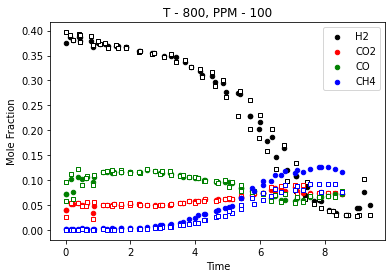

In [ ]:
ax = h2_df_800_100.plot.scatter(x = 'Time', y = 'H2 MF Prediction', color = 'black', figsize =(6,4))
h2_df_800_100.plot.scatter(x = 'Time', y = 'H2 Mole Fraction', marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
co2_df_800_100.plot.scatter(x = 'Time', y = 'CO2 MF Prediction', color = 'red', ax = ax)
co2_df_800_100.plot.scatter(x = 'Time', y = 'CO2 MF',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
co_df_800_100.plot.scatter(x = 'Time', y = 'CO MF Prediction', color = 'green', ax = ax)
co_df_800_100.plot.scatter(x = 'Time', y = 'CO MF',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_df_800_100.plot.scatter(x = 'Time', y = 'CH4 MF Prediction', color = 'blue', ax = ax)
ch4_df_800_100.plot.scatter(x = 'Time', y = 'CH4MF',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['H2', 'CO2', 'CO', 'CH4'])
plt.ylabel('Mole Fraction')
plt.title('T - 800, PPM - 100')
plt.savefig('../Plots/Figure-4/800-100.png')

In [ ]:
ch4_conv_df = pd.read_csv('../Predictions-RF/CH4_Conversion_Predictions.csv')

In [ ]:
ch4_conv_df

,Unnamed: 0,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,0,1073.15,5520000.0,17.1400,31.0,13.020681,0.666667,2.76,0.543128,0.541690
1,1,1073.15,150000.0,24.0000,50.0,0.982528,1.000000,0.00,0.741419,0.751399
2,2,1073.15,150000.0,5.7616,20.0,20.647502,0.672495,2.02,0.479312,0.479233
3,3,973.15,5520000.0,18.3100,15.0,13.969142,0.666667,3.07,0.266616,0.271619
4,4,973.15,5520000.0,18.3100,15.0,14.017625,0.666667,3.07,0.283335,0.279763
...,...,...,...,...,...,...,...,...,...,...
2463,2463,973.15,5520000.0,18.3100,145.0,8.297538,0.666667,3.07,0.057096,0.058041
2464,2464,973.15,5520000.0,18.3100,15.0,7.719580,0.666667,3.07,0.440721,0.426493
2465,2465,1073.15,150000.0,5.7616,20.0,9.159874,0.672495,2.02,0.836621,0.834598
2466,2466,973.15,5520000.0,18.3100,52.0,4.541272,0.666667,3.07,0.193839,0.187501


In [ ]:
ch4_700 = ch4_conv_df[ch4_conv_df['Temp'] == 973.15]
ch4_800 = ch4_conv_df[ch4_conv_df['Temp'] == 1073.15]
ch4_900 = ch4_conv_df[ch4_conv_df['Temp'] == 1173.15]

# ch4_700_5 = ch4_700[ch4_700['PPM'] == 5]
# ch4_700_10 = ch4_700[ch4_700['PPM'] == 10]

# ch4_800_5 = ch4_800[ch4_800['PPM'] == 5]
# ch4_800_10 = ch4_800[ch4_800['PPM'] == 10]

In [ ]:
len(ch4_900[ch4_900['H2O/CH4'] != 0])

193

In [ ]:
ch4_700_5_onehalf = ch4_700_5[ch4_700_5['CO2/CH4'] != 0.5]
ch4_700_10_onehalf = ch4_700_10[ch4_700_10['CO2/CH4'] != 0.5]

In [ ]:
ch4_800_5_onehalf = ch4_800_5[ch4_800_5['CO2/CH4'] != 0.5]
ch4_800_10_onehalf = ch4_800_10[ch4_800_10['CO2/CH4'] != 0.5]

In [ ]:
ch4_700_5_two = ch4_700_5[ch4_700_5['CO2/CH4'] == 0.5]
ch4_700_10_two = ch4_700_10[ch4_700_10['CO2/CH4'] == 0.5]

In [ ]:
ch4_800_5_two = ch4_800_5[ch4_800_5['CO2/CH4'] == 0.5]
ch4_800_10_two = ch4_800_10[ch4_800_10['CO2/CH4'] == 0.5]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c8d1c10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c8bd1d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


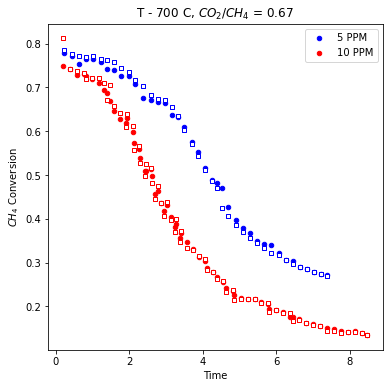

In [ ]:
ax = ch4_700_5_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
ch4_700_5_onehalf.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_700_10_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
ch4_700_10_onehalf.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 700 C, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-9/700-0.67-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c6eaf50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c6ea350> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


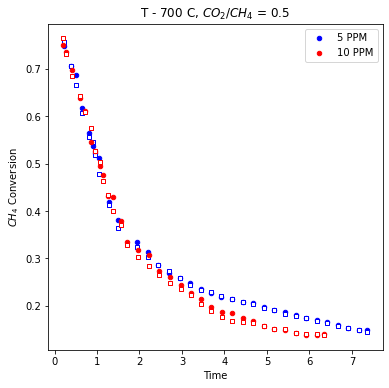

In [ ]:
ax = ch4_700_5_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
ch4_700_5_two.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_700_10_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
ch4_700_10_two.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 700 C, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-9/700-0.5-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c56dfd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c5fecd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


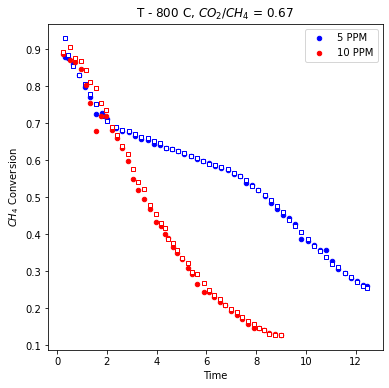

In [ ]:
ax = ch4_800_5_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
ch4_800_5_onehalf.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_800_10_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
ch4_800_10_onehalf.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 800 C, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-9/800-0.67-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c657ad0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f888c657ed0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


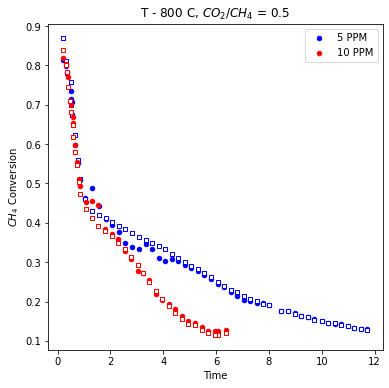

In [ ]:
ax = ch4_800_5_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
ch4_800_5_two.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_800_10_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
ch4_800_10_two.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 800 C, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-9/800-0.5-0.png')

In [ ]:
ch4_700_20 = ch4_700[ch4_700['PPM'] == 20]
ch4_700_50 = ch4_700[ch4_700['PPM'] == 50]
ch4_700_100 = ch4_700[ch4_700['PPM'] == 100]

ch4_800_20 = ch4_800[ch4_800['PPM'] == 20]
ch4_800_50 = ch4_800[ch4_800['PPM'] == 50]
ch4_800_100 = ch4_800[ch4_800['PPM'] == 100]

In [ ]:
ch4_900 = ch4_conv_df[ch4_conv_df['Temp'] == 1173.15]

In [ ]:
CH4_700_20_other = ch4_700_20[ch4_700_20['CO2/CH4'] != 1]
CH4_800_20_other = ch4_800_20[ch4_800_20['CO2/CH4'] != 1]
CH4_700_50_other = ch4_700_50[ch4_700_50['CO2/CH4'] != 1]
CH4_800_50_other = ch4_800_50[ch4_800_50['CO2/CH4'] != 1]
CH4_700_100_other = ch4_700_100[ch4_700_100['CO2/CH4'] != 1]
CH4_800_100_other = ch4_800_100[ch4_800_100['CO2/CH4'] != 1]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec116bd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febf04490> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febf19a10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


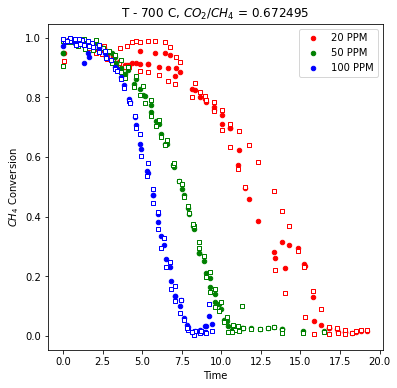

In [ ]:
ax = CH4_700_20_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'red')
CH4_700_20_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
CH4_700_50_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'green', figsize =(6,6), ax = ax)
CH4_700_50_other.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
CH4_700_100_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
CH4_700_100_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['20 PPM','50 PPM', '100 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 700 C, $CO_2$/$CH_4$ = 0.672495')
plt.savefig('../Plots/Figure-5/700-1.4-2.02.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febe902d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febe80450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febe904d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


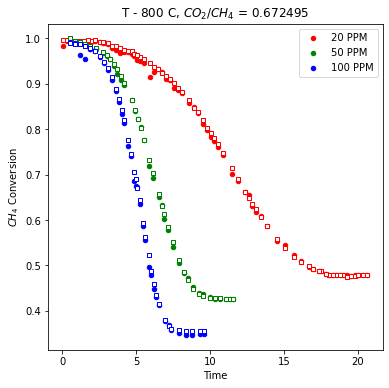

In [ ]:
ax = CH4_800_20_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'red')
CH4_800_20_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
CH4_800_50_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'green', figsize =(6,6), ax = ax)
CH4_800_50_other.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
CH4_800_100_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
CH4_800_100_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
plt.legend(['20 PPM','50 PPM', '100 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 800 C, $CO_2$/$CH_4$ = 0.672495')
plt.savefig('../Plots/Figure-5/800-1.4-2.02.png')

In [ ]:
ch4_700_15 = ch4_700[ch4_700['PPM'] == 15]
ch4_700_31 = ch4_700[ch4_700['PPM'] == 31]
ch4_700_52 = ch4_700[ch4_700['PPM'] == 52]
ch4_700_77 = ch4_700[ch4_700['PPM'] == 77]
ch4_700_108 = ch4_700[ch4_700['PPM'] == 108]
ch4_700_145 = ch4_700[ch4_700['PPM'] == 145]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febd3ddd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec274150> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec2ffb90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: T

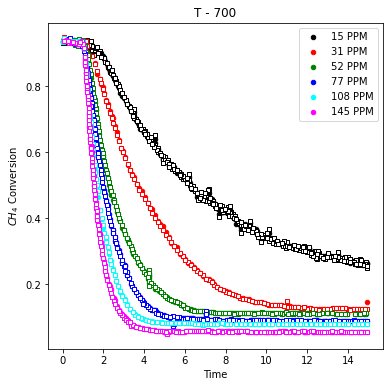

In [ ]:
ax = ch4_700_15.plot.scatter(x = 'Time', y = 'y_pred', color = 'black')
ch4_700_15.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'black', ax =ax, label='_nolegend_')
ch4_700_31.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', figsize =(6,6), ax = ax)
ch4_700_31.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
ch4_700_52.plot.scatter(x = 'Time', y = 'y_pred', color = 'green', ax = ax)
ch4_700_52.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'green', ax =ax, label='_nolegend_')
ch4_700_77.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', ax = ax)
ch4_700_77.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_700_108.plot.scatter(x = 'Time', y = 'y_pred', color = 'cyan', ax = ax)
ch4_700_108.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'cyan', ax =ax, label='_nolegend_')
ch4_700_145.plot.scatter(x = 'Time', y = 'y_pred', color = 'magenta', ax = ax)
ch4_700_145.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'magenta', ax =ax, label='_nolegend_')
plt.legend(['15 PPM','31 PPM', '52 PPM', '77 PPM', '108 PPM', '145 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 700')
plt.savefig('../Plots/Figure-6/700-all.png')

In [ ]:
ch4_800_31 = ch4_800[ch4_800['PPM'] == 31]
ch4_800_108 = ch4_800[ch4_800['PPM'] == 108]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec481490> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1fec5ab390> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


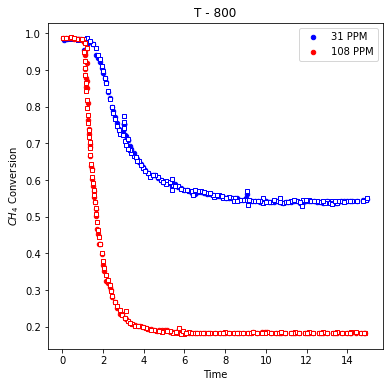

In [ ]:
ax = ch4_800_31.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue')
ch4_800_31.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_800_108.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', figsize =(6,6), ax = ax)
ch4_800_108.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['31 PPM', '108 PPM'])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 800')
plt.savefig('../Plots/Figure-6/800-all.png')

In [ ]:
ch4_900_31 = ch4_900[ch4_900['PPM'] == 31]
ch4_900_108 = ch4_900[ch4_900['PPM'] == 108]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febbfe390> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f1febc0bd90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


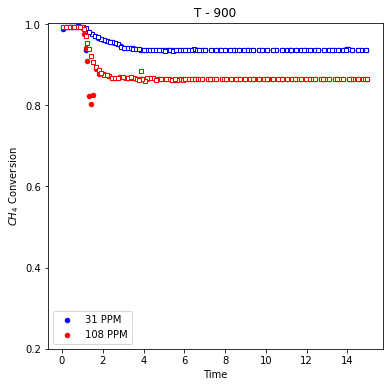

In [ ]:
ax = ch4_900_31.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue')
ch4_900_31.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
ch4_900_108.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', figsize =(6,6), ax = ax)
ch4_900_108.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['31 PPM', '108 PPM'])
plt.yticks([0.2,0.4,0.6,0.8,1])
plt.ylabel("$CH_4$ Conversion")
plt.title('T - 900')
plt.savefig('../Plots/Figure-6/900-all.png')

In [ ]:
ch4_conv_df = pd.read_csv('../Predictions-RF/full_pred_ch4_conv.csv')

In [ ]:
co2_conv_df = pd.read_csv('./CO2_Conversion_2.csv')

In [ ]:
co2_conv_df

,Unnamed: 0,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,0,973.15,180000.0,16.2,5.0,1.966706,0.666667,0.0,0.867753,0.849044
1,1,1073.15,150000.0,16.2,5.0,4.334021,0.666667,0.0,0.858157,0.855792
2,2,1073.15,150000.0,24.0,100.0,1.022549,1.000000,0.0,0.825000,0.806726
3,3,1073.15,150000.0,16.2,5.0,5.750992,0.500000,0.0,0.476020,0.464910
4,4,1073.15,150000.0,16.2,5.0,0.652647,0.500000,0.0,0.904611,0.919810
...,...,...,...,...,...,...,...,...,...,...
522,522,1073.15,150000.0,16.2,5.0,3.618759,0.500000,0.0,0.628472,0.557101
523,523,1073.15,150000.0,16.2,5.0,1.451215,0.500000,0.0,0.758368,0.742136
524,524,973.15,150000.0,24.0,50.0,2.226760,1.000000,0.0,0.379921,0.377914
525,525,973.15,150000.0,24.0,50.0,2.066317,1.000000,0.0,0.421260,0.413819


In [ ]:
co2_700 = co2_conv_df[co2_conv_df['Temp'] == 973.15]
co2_800 = co2_conv_df[co2_conv_df['Temp'] == 1073.15]


# co2_700_5 = co2_700[co2_700['PPM'] == 5]
# co2_700_10 = co2_700[co2_700['PPM'] == 10]

# co2_800_5 = co2_800[co2_800['PPM'] == 5]
# co2_800_10 = co2_800[co2_800['PPM'] == 10]

In [ ]:
co2_700_5_onehalf = co2_700_5[co2_700_5['CO2/CH4'] != 0.5]
co2_700_10_onehalf = co2_700_10[co2_700_10['CO2/CH4'] != 0.5]

In [ ]:
co2_800_5_onehalf = co2_800_5[co2_800_5['CO2/CH4'] != 0.5]
co2_800_10_onehalf = co2_800_10[co2_800_10['CO2/CH4'] != 0.5]

In [ ]:
co2_700_5_two = co2_700_5[co2_700_5['CO2/CH4'] == 0.5]
co2_700_10_two = co2_700_10[co2_700_10['CO2/CH4'] == 0.5]

In [ ]:
co2_800_5_two = co2_800_5[co2_800_5['CO2/CH4'] == 0.5]
co2_800_10_two = co2_800_10[co2_800_10['CO2/CH4'] == 0.5]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05724e8950> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572c09a10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


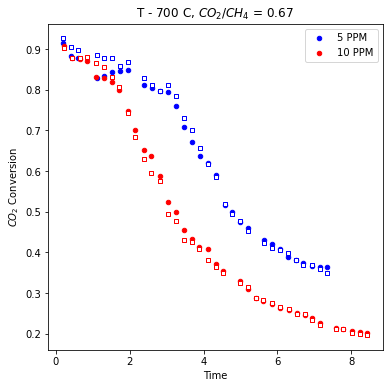

In [ ]:
ax = co2_700_5_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
co2_700_5_onehalf.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co2_700_10_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
co2_700_10_onehalf.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CO_2$ Conversion")
plt.title('T - 700 C, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-10/700-0.67-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572b99ad0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057256dbd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


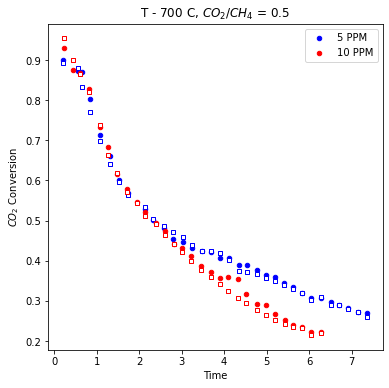

In [ ]:
ax = co2_700_5_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
co2_700_5_two.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co2_700_10_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
co2_700_10_two.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CO_2$ Conversion")
plt.title('T - 700 C, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-10/700-0.5-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f05723b9f50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f057242a190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


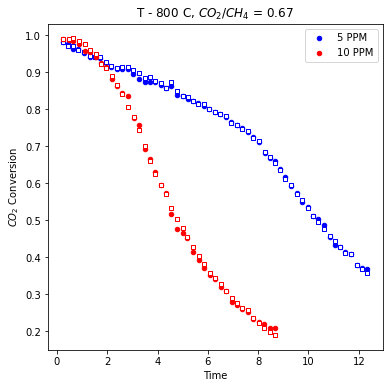

In [ ]:
ax = co2_800_5_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
co2_800_5_onehalf.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co2_800_10_onehalf.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
co2_800_10_onehalf.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CO_2$ Conversion")
plt.title('T - 800 C, $CO_2$/$CH_4$ = 0.67')
plt.savefig('../Plots/Figure-10/800-0.67-0.png')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0572431a10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f0570f06550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


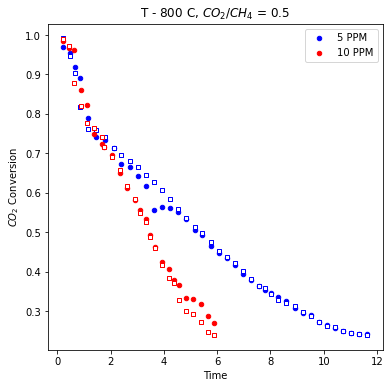

In [ ]:
ax = co2_800_5_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
co2_800_5_two.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
co2_800_10_two.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
co2_800_10_two.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel("$CO_2$ Conversion")
plt.title('T - 800 C, $CO_2$/$CH_4$ = 0.5')
plt.savefig('../Plots/Figure-10/800-0.5-0.png')